### Documentation:
#### Data Set: 6.overlap
#### Description:The dataset consists of three columns and 100 rows which includes two feature columns and one label column. Features columns are in the form of float and continuous values ranges from [4.900000 to 7.900000] and [2.000000 to 3.800000] and the means are at [6.262000 and 2.872000]. Whereas label is in the form discreate numerical float values that inclueds [0 and 1]. 50% of the data consists of 0 and rest consists of 1 as labels. There are no null values consists in the dataset. Pattern that is formed by the input features is linear separatering. That means a liner line is separating 0 label and 1 label,but some of the labels are overlapping on each other.

### Importing Libraries: The required libraries are imported at the beginning of the code.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Loading the Dataset:
- The code reads a CSV file using Pandas, assuming the file is located at "C:\Users\dell\Downloads\Deep Learning data\6.overlap.csv". The dataset is stored in the DataFrame df.

In [117]:
df = pd.read_csv("C:\\Users\\dell\\Downloads\\Deep Learning data\\6.overlap.csv",header = None)


#### The first few rows of the DataFrame are displayed using the head() function.

In [118]:
df.head()

,0,1,2
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


#### Gives the dimensions of the dataset (number of rows, number of columns).


In [119]:
df.shape

(100, 3)

#### Provides information about the dataset, including the data types of each column and the number of non-null values.

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


#### Generates descriptive statistics of the dataset, such as count, mean, standard deviation, minimum, and maximum values for each numerical column. 

In [121]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,6.262000,2.872000,0.500000
std,0.662834,0.332751,0.502519
min,4.900000,2.000000,0.000000
25%,5.800000,2.700000,0.000000
50%,6.300000,2.900000,0.500000
75%,6.700000,3.025000,1.000000
max,7.900000,3.800000,1.000000


In [122]:
df.isna().sum()

0    0
1    0
2    0
dtype: int64

In [126]:
df.duplicated().sum()

12

In [127]:
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

12


In [129]:
print(df.duplicated().sum())


0


### Data Visualization:
-  A scatter plot is created using Seaborn to visualize the data points, where the x-axis represents df[0], the y-axis represents df[1], and the color of the points is determined by df[2]

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

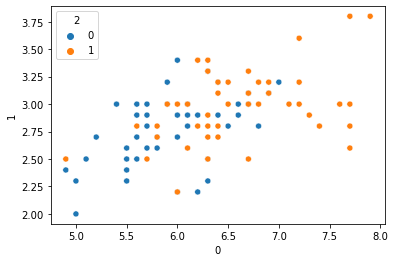

In [131]:
sns.scatterplot(df[0],df[1],hue = df[2])

### Train-Test Split:
- The dataset is split into training and testing sets using the train_test_split function from scikit-learn. The features (x_train, x_test) consist of columns 0 and 1 from the DataFrame, while the target variables (y_train, y_test) correspond to column 2. The testing set size is set to 10% of the total dataset.

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[[0,1]],df[2],test_size=0.1)

### Data Preprocessing:
- The features are standardized using scikit-learn's StandardScaler. The fit_transform method is applied to the training set (x_train), and the transform method is applied to the testing set (x_test).


In [134]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_trains =std.fit_transform(X_train)
X_tests =std.transform(X_test)

### Neural Network Model:
- A sequential model is created using Keras from TensorFlow. It consists of three dense layers, with the first two layers having a "tanh" activation function, dropout layers with a dropout rate of 0.2 after each dense layer, and the last layer having a sigmoid activation function. The model architecture is summarized using the summary() method.

In [135]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [136]:
model=Sequential()
model.add(Dense(3,activation="tanh",kernel_initializer='random_uniform',input_dim=2))
model.add(Dropout(0.2))
model.add(Dense(2,activation="tanh",kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [149]:
model.get_weights()

[array([[-0.32879168, -0.30022523,  0.28512633],
        [-0.22171918, -0.19725625,  0.20864868]], dtype=float32),
 array([-1.0702061e-06, -7.6414780e-03,  2.1708503e-02], dtype=float32),
 array([[-0.29451305,  0.24831755],
        [-0.3025592 ,  0.2631276 ],
        [ 0.33361194, -0.24895681]], dtype=float32),
 array([ 0.01197835, -0.00510345], dtype=float32),
 array([[ 0.895319 ],
        [-1.1486458]], dtype=float32),
 array([0.0021167], dtype=float32)]

In [138]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 3)                 9         
                                                                 
 dropout_6 (Dropout)         (None, 3)                 0         
                                                                 
 dense_21 (Dense)            (None, 2)                 8         
                                                                 
 dropout_7 (Dropout)         (None, 2)                 0         
                                                                 
 dense_22 (Dense)            (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


### Model Compilation and Training: 
- The model is compiled with the Adam optimizer, binary cross-entropy loss function, and accuracy metric. It is then trained on the preprocessed training data (x_trainf, y_train) for 50 epochs with a batch size of 10. The validation split is set to 0.2, meaning 20% of the training data is used for validation during training. The training history is stored in the history variable.

In [139]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [140]:
history=model.fit(X_trains,y_train,batch_size=10,epochs=50,validation_split=0.2)

Epoch 1/50
7/7 [==============================] - 1s 32ms/step - loss: 0.6935 - accuracy: 0.4127 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5079 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5397 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5556 - val_loss: 0.6927 - val_accuracy: 0.6250
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.5238 - val_loss: 0.6924 - val_accuracy: 0.5625
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6924 - accuracy: 0.5397 - val_loss: 0.6921 - val_accuracy: 0.5625
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6918 - accuracy: 0.5556 - val_loss: 0.6915 - val_accuracy: 0.6250
Epoch 8/50
7/7 [=================

### Prediction and Evaluation:
- The model is used to predict the target values for the preprocessed testing data (x_testf). The predictions are then thresholded at 0.5 to obtain binary predictions (y_capf). The accuracy score is calculated by comparing these predictions with the actual target values (y_test).

In [141]:
from mlxtend.plotting import plot_decision_regions as pt

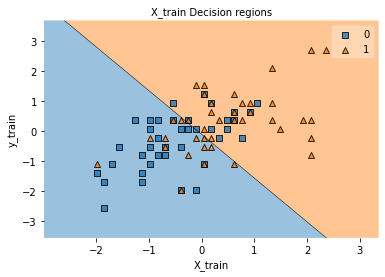

In [142]:
#plt.figure(figsize=(4,4),dpi=150)
pt(X_trains,y_train.values.astype(int),clf=model)
plt.title("X_train Decision regions",color='black',fontsize='medium')
plt.xlabel("X_train",color='black',fontsize='medium')
plt.ylabel("y_train",color='black',fontsize='medium')
plt.show()

In [143]:
y_pred=model.predict(X_tests)

In [144]:
y_predf = np.array([1 if x>0.5 else 0 for x in y_pred])

In [145]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.7777777777777778

### Plotting Loss Curves:
- The training and validation loss curves are plotted using Matplotlib based on the history object obtained during training.

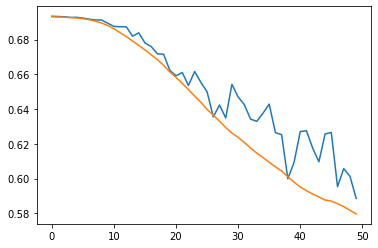

In [146]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### Decision Regions Plot:
- The plot_decision_regions function from the mlxtend library is used to plot the decision regions of the model. It takes the feature values (df[[0, 1]].values) and the corresponding target values (df[2].values.astype(int)) from the entire dataset as input. The decision regions are visualized by coloring the regions based on the model's predictions.

### Plotting Decision Regions for Testing Set:
- Similar to the previous step, decision regions are plotted for the preprocessed testing set (x_testf, y_test.values.astype(int)).


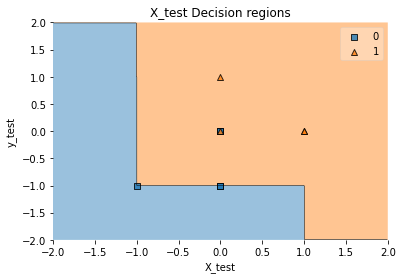

In [148]:
#plt.figure(figsize=(6,4),dpi=150)
pt(X_tests.astype(int),y_predf,clf=model)
plt.title("X_test Decision regions")
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

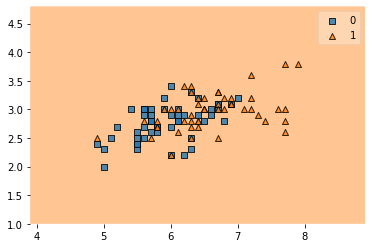

In [105]:
plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)

### This code demonstrates the process of loading data, visualizing it, training a neural network model, evaluating its performance, and visualizing the decision regions.